<a href="https://colab.research.google.com/github/llskyhi/109-2_BigDataProgramming/blob/main/0413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
install.packages(
  c(
    "tidyverse",
    "lubridate",
    "showtext",
    "devtools"
  )
)
devtools::install_github("cttobin/ggthemr")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




pillar (1.5.1 -> 1.6.0) [CRAN]


Installing 1 packages: pillar

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp1TEScE/remotes3a40ada9b2/Mikata-Project-ggthemr-4a31e0d/DESCRIPTION’
─  preparing ‘ggthemr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘ggthemr/README_files’
─  building ‘ggthemr_1.1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [36]:
library(tidyverse)
library(lubridate)
library(showtext)
showtext_auto(T)
library(ggthemr)

In [63]:
url = "nobel_winners.csv"
data <- read.csv(url)
dim(data)
head(data, 2)

[1] 969  18

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
2,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NA,NA,NA,1907-09-07,Châtenay,France


In [61]:
# 把左邊的東東作為右邊的函式的參數?
# 閱讀程式碼時可以理解為由左至右執行, 但又將之前的結果作為之後的輸入
Sys.Date() %>% format(format = "%Y")
# 等同於
format(Sys.Date(), format = "%Y")

data %>% count(category)

[1] "2021"

[1] "2021"

category,n
<chr>,<int>
Chemistry,194
Economics,83
Literature,113
Medicine,227
Peace,130
Physics,222


In [52]:
thems <- c(
  "dust",
  "lilac"
  )

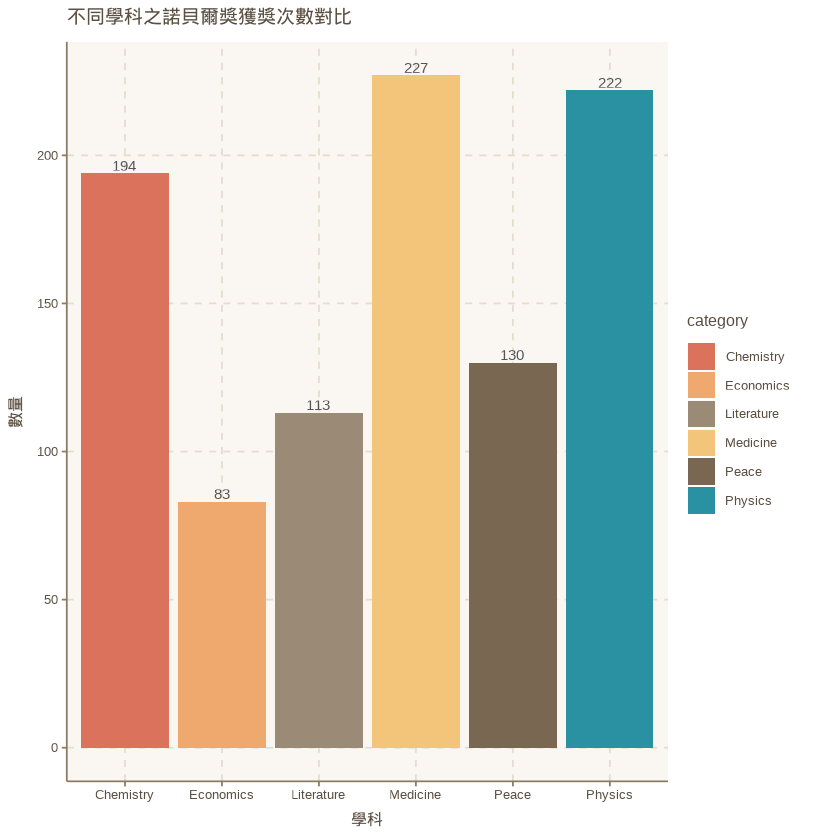

In [90]:
ggthemr(thems[1])
data %>%
count(category) %>%
ggplot(
  aes(
    x = category,
    y = n,
    fill = category
  )
) +
geom_col() +
geom_text(
  aes(label=n),
  vjust = -0.25
) +
labs(
  title = "不同學科之諾貝爾獎獲獎次數對比",
  x = "學科",
  y = "數量"
)

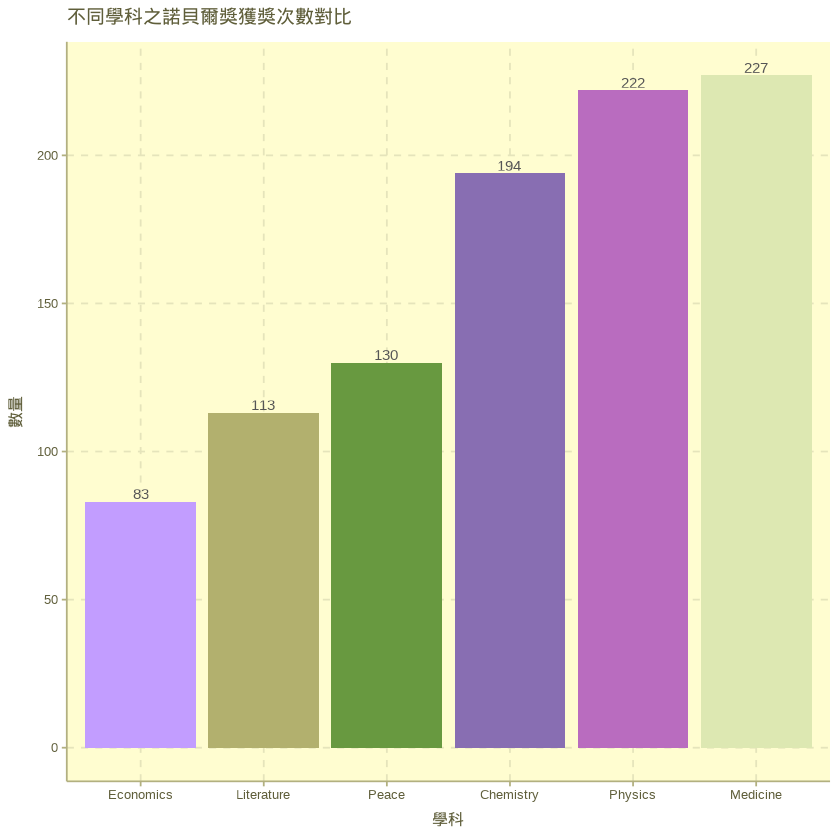

In [91]:
ggthemr(thems[2])
data %>%
count(category) %>%
ggplot(
  aes(
    x = fct_reorder(category, n),
    y = n,
    fill = category
  )
) +
geom_col() +
geom_text(
  aes(label = n),
  vjust = -0.25
) +
labs(
  title = "不同學科之諾貝爾獎獲獎次數對比",
  x = "學科",
  y = "數量"
) +
theme(legend.position = "none")

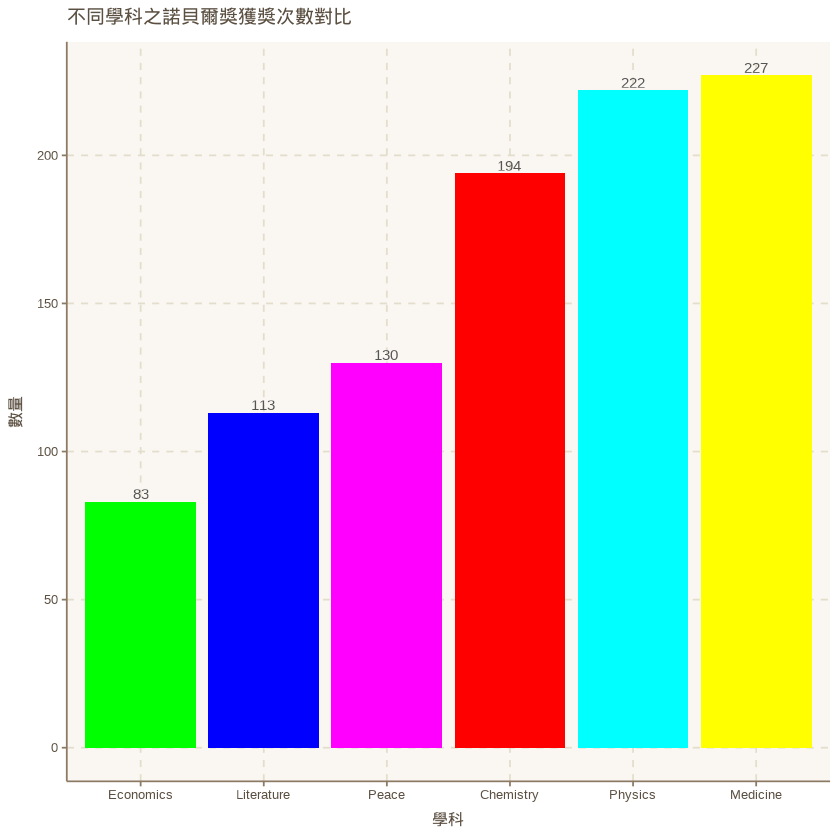

In [50]:
# 自訂配色
data %>%
count(category) %>%
ggplot(
  aes(
    x = fct_reorder(category, n),
    y = n
  )
) +
geom_col(
  fill = c(
      "#ff0000",
      "#00ff00",
      "#0000ff",
      "#ffff00",
      "#ff00ff",
      "#00ffff"
  )
) +
geom_text(
  aes(label = n),
  vjust = -0.25
) +
labs(
  title = "不同學科之諾貝爾獎獲獎次數對比",
  x = "學科",
  y = "數量"
) +
theme(legend.position = "none")

In [68]:
data %>%
dplyr::filter(birth_country == "Japan") %>%
dplyr::select(full_name, prize_year, category) %>%
head(5)

,full_name,prize_year,category
,<chr>,<int>,<chr>
1,Hideki Yukawa,1949,Physics
2,Hideki Yukawa,1949,Physics
3,Sin-Itiro Tomonaga,1965,Physics
4,Yasunari Kawabata,1968,Literature
5,Leo Esaki,1973,Physics


In [74]:
winners <- 
data %>%
mutate_if(is.character, tolower) %>%
distinct_at(
  vars(
    full_name,
    prize_year,
    category
  ),
  .keep_all = T
) %>%
mutate(
  decade = 10 * (prize_year %/% 10),
  prize_age = prize_year - year(birth_date)
)

head(winners, 2)

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,prize_age
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1901,chemistry,the nobel prize in chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,individual,jacobus henricus van 't hoff,1852-08-30,rotterdam,netherlands,male,berlin university,berlin,germany,1911-03-01,berlin,germany,1900,49
2,1901,literature,the nobel prize in literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,individual,sully prudhomme,1839-03-16,paris,france,male,NA,NA,NA,1907-09-07,châtenay,france,1900,62


In [ ]:
# 獲獎數
winners %>% count(full_name, sort = T)

Warning message:
“Removed 1 rows containing missing values (position_stack).”


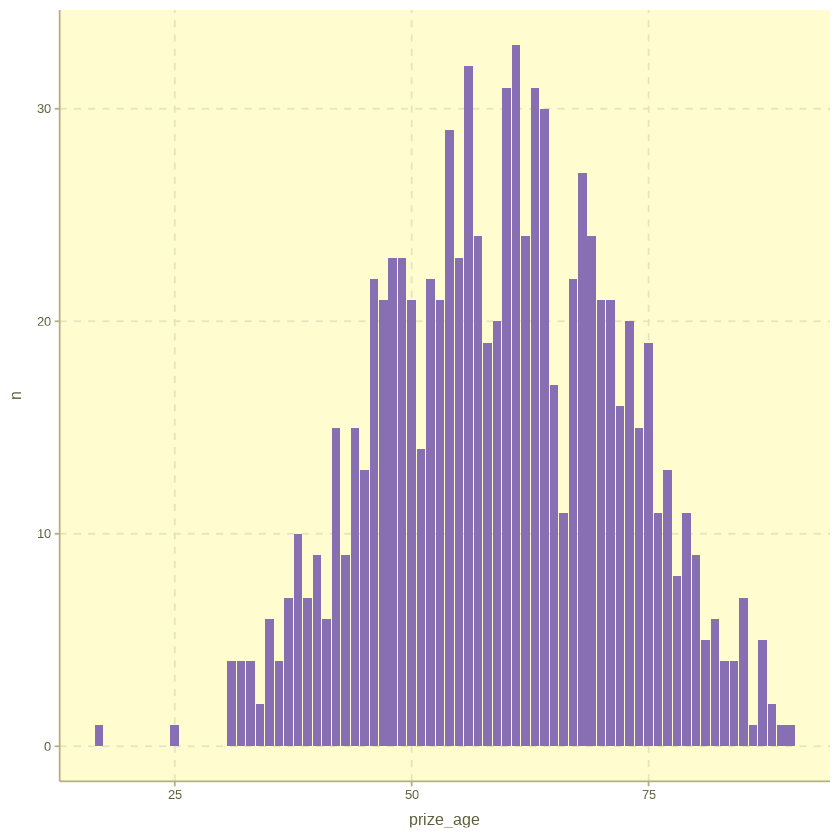

In [78]:
# 獲獎年齡分布
winners %>%
count(prize_age) %>%
ggplot(
  aes(
    x = prize_age,
    y = n
  )
) +
geom_col()

In [79]:
# 獲獎者平均年齡
winners %>%
group_by(category) %>%
summarise(
  mean_prize_age = mean(prize_age, na.rm = T)
)

category,mean_prize_age
<chr>,<dbl>
chemistry,58.04023
economics,67.19481
literature,64.67257
medicine,57.97156
peace,61.38835
physics,55.37438


Warning message:
“Removed 30 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 30 rows containing missing values (geom_point).”


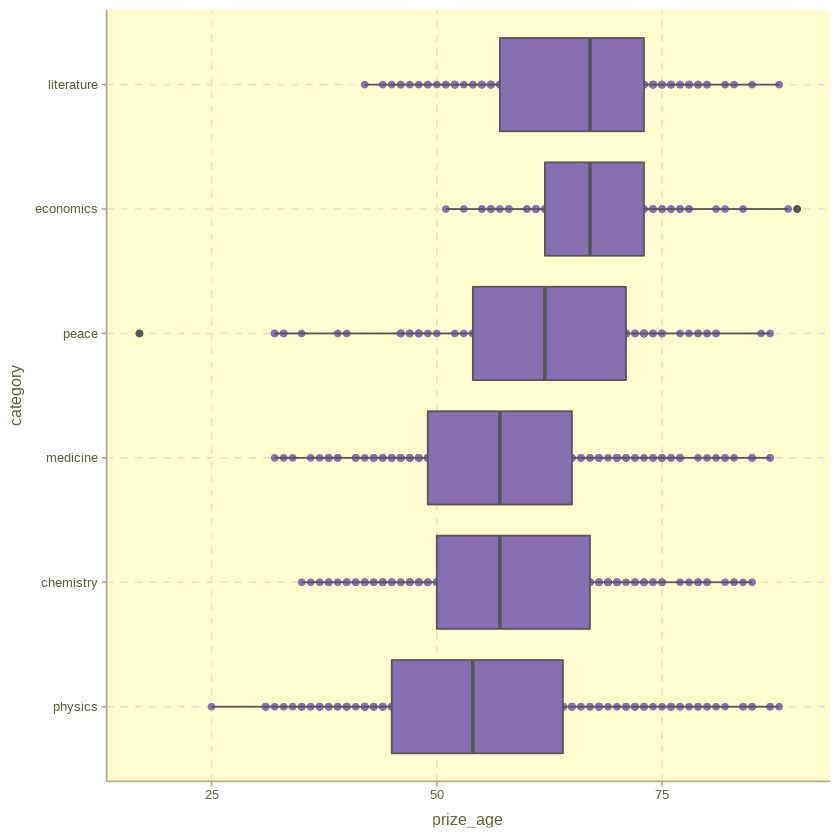

In [81]:
# 各類別諾貝爾獎的獲獎年齡分布
winners %>%
mutate(
  category = fct_reorder(
    category,
    prize_age,
    median,
    na.rm = T
  )
) %>%
ggplot(
  aes(
    category,
    prize_age
  )
) +
geom_point() +
geom_boxplot() +
coord_flip()

In [82]:
install.packages("ggridges")
library(ggridges)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Picking joint bandwidth of 3.78

Warning message:
“Removed 30 rows containing non-finite values (stat_density_ridges).”


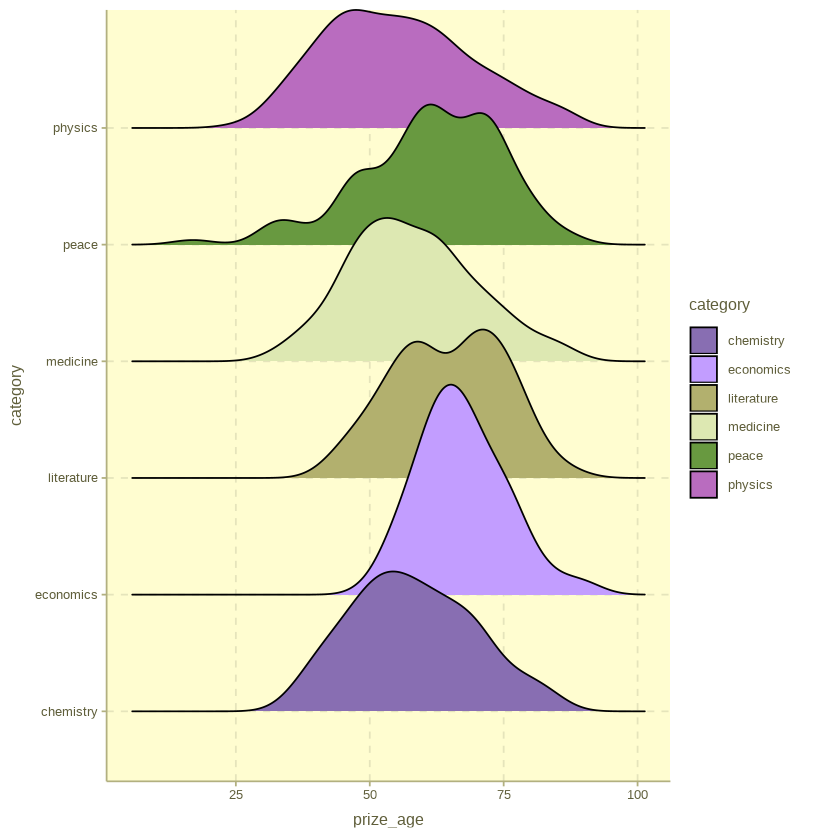

In [83]:
# 這啥?
winners %>%
ggplot(
  aes(
    x = prize_age,
    y = category,
    fill = category
  )
) +
geom_density_ridges()

In [84]:
# 個人獲獎者的性別分布
winners %>%
dplyr::filter(laureate_type == "individual") %>%
count(category, gender) %>%
group_by(category) %>%
mutate(prop = n/sum(n))

category,gender,n,prop
<chr>,<chr>,<int>,<dbl>
chemistry,female,4,0.022857143
chemistry,male,171,0.977142857
economics,female,1,0.012820513
economics,male,77,0.987179487
literature,female,14,0.123893805
literature,male,99,0.876106195
medicine,female,12,0.056872038
medicine,male,199,0.943127962
peace,female,14,0.140000000


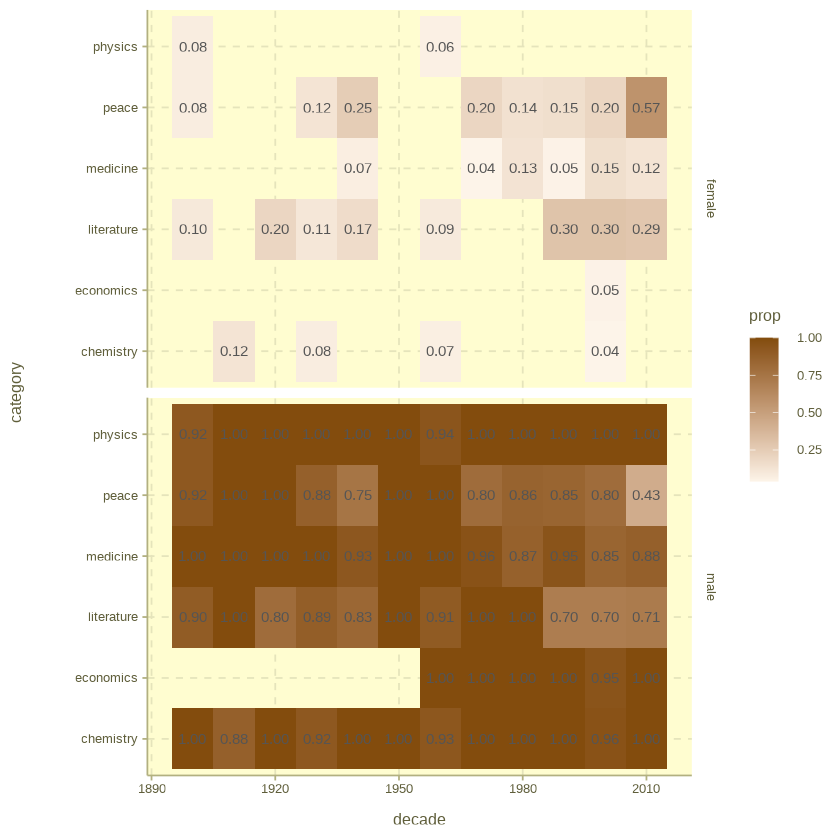

In [86]:
# ??????
winners %>%
dplyr::filter(laureate_type == "individual") %>%
count(decade, category, gender) %>%
group_by(decade, category) %>%
mutate(prop = n/sum(n)) %>%
ggplot(
  aes(
    decade,
    category,
    fill = prop
  )
) +
geom_tile(size = 0.7) +
geom_text(
  aes(
    label = scales::number(prop, accuracy = .01)
  )
) +
facet_grid(
  vars(gender)
) +
scale_fill_gradient(
  low = "#fdf4e9",
  high = "#834C0D"
)